This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

AYUSH VERMA |  21f3000500@ds.study.iitm.ac.in | 9457839795

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

---
## Basic imports and data

In [ ]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [ ]:
data_3d = skimage.data.brain()

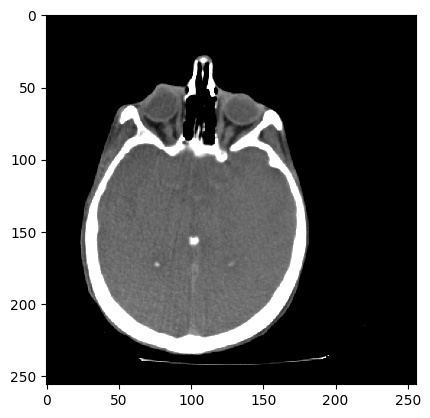

In [ ]:
plt.imshow(data_3d[7,...],cmap='gray',vmin=5000,vmax=10000)

In [ ]:
data_3d.shape,data_3d.dtype

((10, 256, 256), dtype('uint16'))

In [ ]:
data_3d.min(),data_3d.max()

(0, 51076)

In [ ]:
data_2d_color = skimage.data.skin()

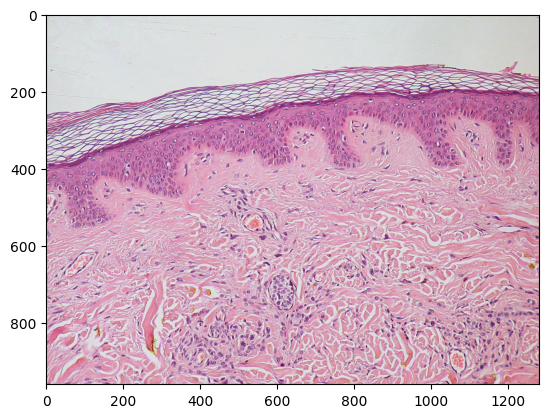

In [ ]:
plt.imshow(data_2d_color)

In [ ]:
data_2d_color.shape, data_2d_color.dtype

((960, 1280, 3), dtype('uint8'))

In [ ]:
data_2d_discrete = skimage.data.shepp_logan_phantom()

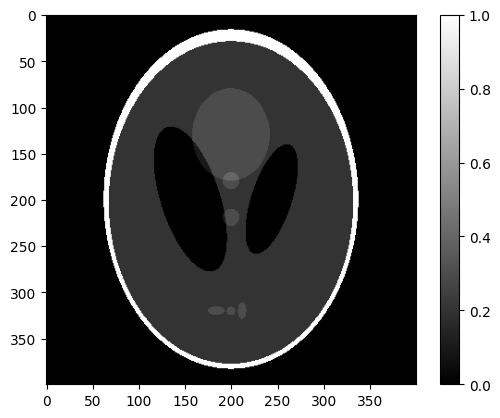

In [ ]:
plt.imshow(data_2d_discrete,cmap='gray')
plt.colorbar()

In [ ]:
data_2d_discrete.shape, data_2d_discrete.dtype

((400, 400), dtype('float64'))

In [ ]:
data_2d_discrete.min(),data_2d_discrete.max()

(0.0, 1.0)

---
# **Basic python tasks**

### Task 1

1(a): Define a function named ```describe```, which returns the properties of the numpy array passed as argument. Use ```scipy.stats.describe```

The function should return an array of dicts which can be loaded in pandas

In [ ]:
# Your 1(a) solution

from scipy.stats import describe as scipy_describe

def describe(arrays):

    # If the input is a single array, convert it to a list containing that array
    if isinstance(arrays, np.ndarray):
        arrays = [arrays]

    results = []
    for arr in arrays:
        # Check if array is empty
        if arr.size == 0:
            results.append({})  # Append an empty dictionary

            continue  # Move to the next array

        try:
            # Check if array contains only numeric values


            if not np.issubdtype(arr.dtype, np.number):
                results.append({'error': "Array contains non-numeric values"})
                continue  # Move to the next array

            # Compute statistics using scipy.stats.describe
            stats = scipy_describe(arr.flatten())

            # Construct a dictionary containing statistical properties
            result = {
                'nobs': stats.nobs,
                'minmax': stats.minmax,
                'mean': stats.mean,
                'variance': stats.variance,
                'skewness': stats.skewness,
                'kurtosis': stats.kurtosis
            }


            results.append(result)
        except Exception as e:
            results.append({'error': str(e)})  # Append an error message to results

    return results



#Handles various errors gracefully
#https://youtu.be/REiAGmXwZNw?si=A3YQtwzNYx5daVBi
#https://youtu.be/6Jz67_xNk7U?si=MKEOmVzXmKZMTbDL
#https://realpython.com/python-statistics/


1(b): Call your function on the data loaded in previous section, wrap it in a pandas dataframe, and print the result

In [ ]:
# Your 1(b) solution
data = [
    np.array([1, 2, 3, 4, 5]),          # Numeric array
    np.array([10, 20, 30, 40, 50]),     # Numeric array
    np.array([]),                       # Empty array
    np.array([1.1, 2.2, 3.3, 4.4, 5.5]) # Numeric array with floats
]

results = describe(data)

# Wrapping the results in a pandas DataFrame
df_results = pd.DataFrame(results)



print(df_results)

   nobs      minmax  mean  variance      skewness  kurtosis
0   5.0      (1, 5)   3.0     2.500  0.000000e+00      -1.3
1   5.0    (10, 50)  30.0   250.000  0.000000e+00      -1.3
2   NaN         NaN   NaN       NaN           NaN       NaN
3   5.0  (1.1, 5.5)   3.3     3.025  4.718535e-16      -1.3


# Task 2

2(a): Define a function to flatten a nested dict (left to right in figure below)

The dict values can be string, numeric, or array of dict.

String and numeric are mandatory in your solution. **Implementation for array is bonus**.

In case of array, the output dict should have keys named using array position.

e.g if
```
"d":[
  {"e":v3,"f":v4},
  {"g":v5,"h":v6}
]

```
then flatten it as
```
"d.0.e":v3,
"d.0.f":v4,
"d.1.g":v5,
"d.1.h":v6
```

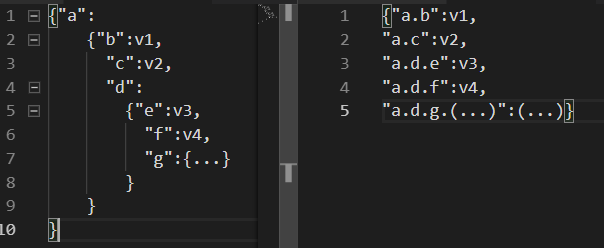

In [ ]:
# your solution 2(a) here

def flatten_dict(d, parent_key='', sep='.'):

  items = []

  for k, v in d.items():
    if parent_key:  # Check if parent_key is not empty before concatenating
        new_key = parent_key + sep + str(k)
    else:
        new_key = str(k)  # If parent_key is empty, use k directly as string

    if isinstance(v, dict):
      items.extend(flatten_dict(v, new_key, sep=sep).items())
    elif isinstance(v, list):
      for i, item in enumerate(v):
        if isinstance(item, dict):
          items.extend(flatten_dict(item, parent_key + sep + str(i), sep=sep).items())
        else:
          items.append((parent_key + sep + str(i), item))
    else:
      items.append((new_key, v))

  return dict(items)



#https://stackoverflow.com/questions/6027558/flatten-nested-dictionaries-compressing-keys
#https://www.freecodecamp.org/news/how-to-flatten-a-dictionary-in-python-in-4-different-ways/
#https://www.geeksforgeeks.org/python-convert-nested-dictionary-into-flattened-dictionary/


2(b): Define a function to unflatten (right to left of figure above).

Dict values can be string or numeric. implementation for array is bonus

In [ ]:
# your solution 2(b) here


# Task 3

Write a NumPy program to create a 3x3 identity matrix and stack it vertically and horizontally.

In [ ]:
# Your solution

identity_matrix = np.identity(3)


v_identity= np.vstack((identity_matrix,identity_matrix))  #stacking two identitymatrix  vertically


h_identity = np.hstack((identity_matrix,identity_matrix))  #stacking two identitymatrix horizontally




#https://www.geeksforgeeks.org/numpy-hstack-in-python/
#https://www.geeksforgeeks.org/numpy-identity-python/

---
# **Numpy/Scipy tasks**

# Task 4

Define a function to crop a square region from a given array, centered at a given r,c position, of given side length.

Your function should return the subarray, and rect (r1,c1,r2,c2), handling underflow and overflow

the rect should be such that
```
subarray = givenarray(r1:r2,c1:c2)
```

In [ ]:
def crop_array(arr: np.ndarray, pos: tuple, sidelen: int):
    if not isinstance(sidelen, int) or sidelen <= 0:
        raise ValueError("Side length must be a positive integer.")

    center_row, center_col = pos
    if not (0 <= center_row < arr.shape[0] and 0 <= center_col < arr.shape[1]):
        raise ValueError("Center position must be within the array bounds.")

    half_side = sidelen // 2

    # Calculate the initial indices for the square region
    start_row = max(center_row - half_side, 0)
    end_row = min(center_row + half_side + 1, arr.shape[0])
    start_col = max(center_col - half_side, 0)
    end_col = min(center_col + half_side + 1, arr.shape[1])

    # Extract the subarray using the adjusted indices
    subarray = arr[start_row:end_row, start_col:end_col]

    # Ensure the returned coordinates match the slicing
    rect = (start_row, start_col, end_row, end_col)
    return subarray, rect


#https://stackoverflow.com/questions/43463523/center-crop-a-numpy-array
#https://www.w3schools.com/python/numpy/numpy_array_slicing.asp
#https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/



# Task 5

Call your function from task4 by passing **data_2d_color**, and random points and side lengths

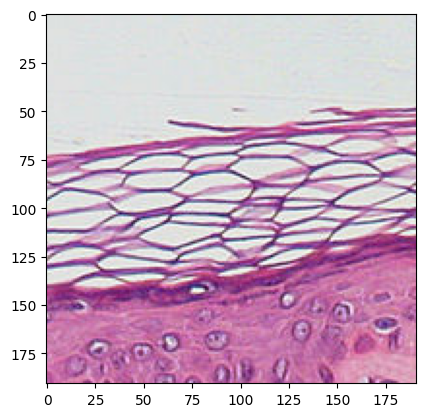

In [ ]:
data_2d_color = skimage.data.skin()
plt.imshow(data_2d_color)

import random


rows, cols, _ = data_2d_color.shape

# Generate random center position within the image bounds
random_center = (random.randint(0, rows-1), random.randint(0, cols-1))

# Generate a random side length, ensuring it's within reasonable bounds
random_sidelen = random.randint(1, min(rows, cols))

# Call the crop_array function with the random parameters
cropped_image, _ = crop_array(data_2d_color, random_center, random_sidelen)


plt.imshow(cropped_image)


plt.show()


# Task 6

Write a single expression to make the color dimension of data_2d_color come to the first dimension.

In [ ]:
# Your solution here
data_2d_color_transposed = data_2d_color.transpose((2, 0, 1))



Show the shape of your result. Then write a single expression to revert color to third dimension. Verify by showing the shape and plt.imshow

Transposed shape: (3, 960, 1280)
(960, 1280, 3)


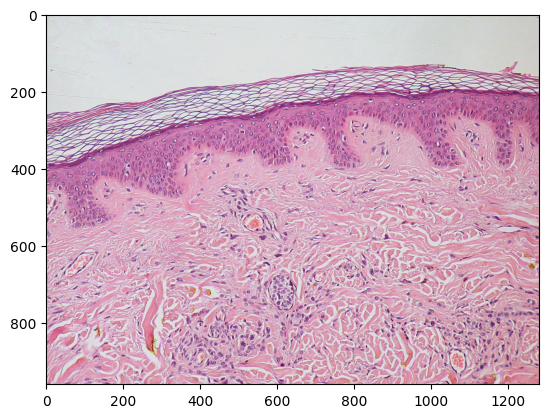

In [ ]:

print("Transposed shape:", data_2d_color_transposed.shape)  #Show the shape of your result.

Color_to_third = data_2d_color.transpose(( 0, 1,2))  # single expression to revert color to third dimension.
print(Color_to_third.shape)  #showing the shape
plt.imshow(Color_to_third)    #Showing the image


#https://stackoverflow.com/questions/43829711/what-is-the-correct-way-to-change-image-channel-ordering-between-channels-first
#https://stackoverflow.com/questions/49558818/change-image-channel-ordering-from-channel-first-to-last/49558856


# Task 7

7(a): Define a function to create a list of (r,c) that trace a semicircle. Use the function signature in the cell below

In [ ]:
from enum import Enum, auto

class Direction(Enum):
  UP=auto()
  DOWN=auto()
  LEFT=auto()
  RIGHT=auto()

def make_semicircle(cen_r:int=250, cen_c:int=250, rad:int=10, facing:Direction=Direction.UP):
    ptslist = []

    if facing == Direction.UP:
        for c in range(cen_c - rad, cen_c + rad + 1):
            r = int((rad ** 2 - (c - cen_c) ** 2) ** 0.5) + cen_r
            ptslist.append((r, c))
    elif facing == Direction.DOWN:
        for c in range(cen_c - rad, cen_c + rad + 1):
            r = int(-((rad ** 2 - (c - cen_c) ** 2) ** 0.5)) + cen_r
            ptslist.append((r, c))
    elif facing == Direction.LEFT:
        for r in range(cen_r - rad, cen_r + rad + 1):
            c = int(-((rad ** 2 - (r - cen_r) ** 2) ** 0.5)) + cen_c
            ptslist.append((r, c))
    elif facing == Direction.RIGHT:
        for r in range(cen_r - rad, cen_r + rad + 1):
            c = int(((rad ** 2 - (r - cen_r) ** 2) ** 0.5)) + cen_c
            ptslist.append((r, c))

    return ptslist



#The function uses the circle equation rearranged to solve for one coordinate given the other. For instance, solving for y in terms of x when facing is UP:
#r = int((rad ** 2 - (c - cen_c) ** 2) ** 0.5) + cen_r

#https://realpython.com/lessons/create-python-enum/#:~:text=00%3A00%20Creating%20enumerations%20with,related%20constants%20as%20Enum%20members.
#https://realpython.com/lessons/create-python-enum/#:~:text=00%3A00%20Creating%20enumerations%20with,related%20constants%20as%20Enum%20members.


# Task 8

 Call the function make_semicircle with random cen_r and cen_c between 100 to 400, and with the returned ptslist, set the points in a zero array of dtype bool, and size (512,512). Use plt.imshow to confirm the result

Make sure to handle over- and underflows in ptslist wrt 512 x 512

233 287


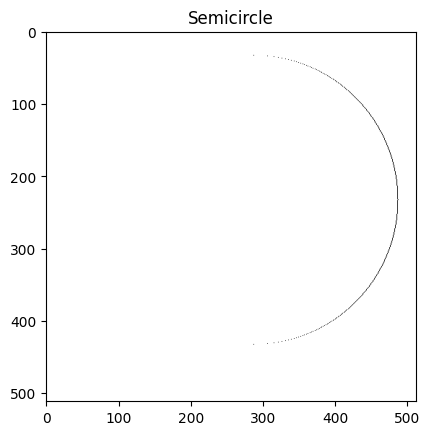

In [ ]:
cen_r,cen_c = np.random.randint(100,400,2)
print(cen_r,cen_c)

ptslist = make_semicircle(cen_r,cen_c,200,Direction.RIGHT)

# your solution here

array = np.zeros((512, 512), dtype=bool)

# Update the elements in the array based on ptslist, handling over- and underflows
for r, c in ptslist:
    if 0 <= r < 512 and 0 <= c < 512:  # Check for over- and underflows
        array[r, c] = True

#
plt.imshow(array, cmap='binary')
plt.title('Semicircle')
plt.show()

#https://youtu.be/uIW5Hi17jO0?si=mYCknQ3glZ0S1rQT
#https://realpython.com/lessons/create-python-enum/#:~:text=00%3A00%20Creating%20enumerations%20with,related%20constants%20as%20Enum%20members.


# Task 9

Generate a synthetic gradient image using NumPy and apply a basic threshold to create a binary image effect.

Modify the generate_gradient_image function to create a different gradient pattern.

Experiment with different threshold values in the apply_threshold function.

Add a function to compute and print the histogram of the original and thresholded images.

In [ ]:
def generate_gradient_image(size):
    """Generate a 2D gradient image of given size."""

    # Create a linear gradient image from 0 to 255
    x = np.linspace(0, 255, size[0])
    y = np.linspace(0, 255, size[1])
    xx, yy = np.meshgrid(x, y, indexing='ij')
    gradient_image = (xx + yy) / 2
    return gradient_image

def apply_threshold(image, threshold=127.5):

    """Apply a simple threshold to the image."""

    # Apply threshold
    binary_image = np.where(image > threshold, 255, 0)
    return binary_image

def display_images(original, modified):
    """Display the original and modified images."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Thresholded Image")
    plt.imshow(modified, cmap='gray')
    plt.axis('off')

    plt.show()

# Main execution
size = (256, 256)
original_image = generate_gradient_image(size)
thresholded_image = apply_threshold(original_image)

display_images(original_image, thresholded_image)


# Task 10 (Bonus)

# **Binary Path Sum**

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.


**Example 1:**

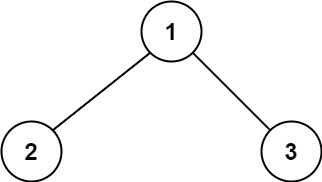

**Input: root** = [1,2,3]

**Output:** 6

**Explanation:** The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

**Example 2:**

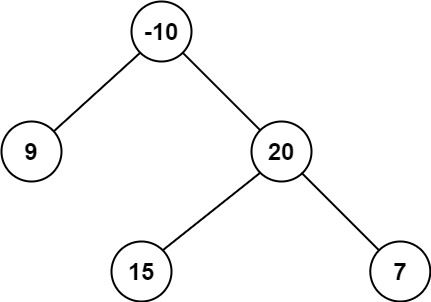

**Input: root** = [-10,9,20,null,null,15,7]

**Output:** 42

**Explanation:** The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:

